In [1]:
using Plots

Analyze rate of approximation for 
$$
f(x) = |\sin(x)|^{3/2}
$$

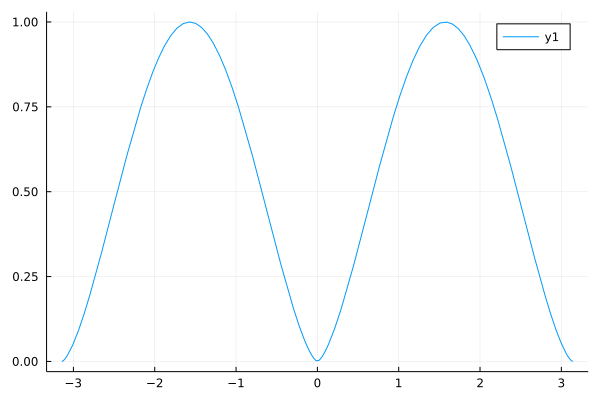

In [2]:
f(x) = abs(sin(x))^1.5

plot(f, -pi, pi)

Jackson Theorem: 
$$
\inf_{t_N} \| f - t_N \|_\infty \lesssim N^{-s} \omega(N^{-1})
$$

Regularity of $f$: 
* piecewise smooth 
* but something happen where $x = 0, \pi$, only care about 0
* at $x = 0$, $f(x) \sim |x|^{3/2}$
* so $f \in C^1$ and 
$$
f' \sim 3/2 |x|^{1/2} x / |x| = \frac{3}{2} {\rm sign}(x) |x|^{1/2}
$$
*  probably $\omega(r) = Cr^{1/2}$

Base on ??? we think the rate will be 
$$
\| f - I_N f \|_\infty \lesssim \log(N) N^{-3/2}
$$

In [4]:
using FFTW, LinearAlgebra, Plots, LaTeXStrings

xgrid(N) = [ j * π / N  for j = 0:2N-1 ]
kgrid(N) = [ 0:N; -N+1:-1 ]

"""
construct the coefficients of the trigonometric interpolant
"""
triginterp(f, N) = fft(f.(xgrid(N))) / (2*N)

"""
to evaluate a trigonometric polynomial just sum coefficients * basis
we the take the real part because we assume the function we are 
approximating is real.
"""
evaltrig(x, F̂) = sum( real(F̂ₖ * exp(im * x * k))
                      for (F̂ₖ, k) in zip(F̂, kgrid(length(F̂) ÷ 2)) )

"""
implementation of a basic error function: 
returns an approximation to the max-norm error
of the trigonometric interpolant, by taking the 
maximum on `Nerr` equispaced sample points
(kwarg)
"""
function triginterperror(f, N; Nerr = 1_362)
    xerr = range(0, 2π, length=Nerr)    # compute error on this grid
    F̂ = triginterp(f, N)                # trigonometric interpolant
    return norm(f.(xerr) - evaltrig.(xerr, Ref(F̂)), Inf)  # max-error on xerr grid
end;

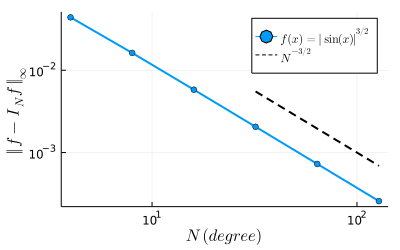

In [13]:
let NN = (2).^(2:7), f = f 
    P = plot( xaxis  = (L"N~{\rm (degree)}", ),
              yaxis  = (:log, L"\Vert f - I_N f ~\Vert_{\infty}"), 
              legend = :topright, 
              xscale = :log10, yscale = :log10, 
              size = (400, 250))
    err = triginterperror.(f, NN)
    plot!(P, NN, err, lw=2, m=:o, ms=3, label = L"f(x) = |\sin(x)|^{3/2}")
    nn = NN[4:end]
    plot!(P, nn, nn.^(-3/2), lw=2, ls=:dash, c=:black, label = L"N^{-3/2}")
end 

